In [101]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [17]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [11]:
df_market_data.isnull().sum()
df_market_data.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [12]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

market_data_scaled = StandardScaler().fit_transform(df_market_data[['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']])



In [19]:
# Create a DataFrame with the scaled data

market_data_transformed = pd.DataFrame(market_data_scaled, columns=['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'])


# Copy the crypto names from the original data
coin_ids = df_market_data.index

# Displaying the 'coin_id' information
print(coin_ids)


# Set the coinid column as index
#market_data_transformed = market_data_transformed.set_index("coin_id")

# Display sample data
#market_data_transformed.head()


Index(['bitcoin', 'ethereum', 'tether', 'ripple', 'bitcoin-cash',
       'binancecoin', 'chainlink', 'cardano', 'litecoin', 'bitcoin-cash-sv',
       'crypto-com-chain', 'usd-coin', 'eos', 'monero', 'tron', 'tezos', 'okb',
       'stellar', 'cosmos', 'cdai', 'neo', 'wrapped-bitcoin', 'leo-token',
       'huobi-token', 'nem', 'binance-usd', 'iota', 'vechain', 'zcash',
       'theta-token', 'dash', 'ethereum-classic', 'ethlend', 'maker', 'havven',
       'omisego', 'celsius-degree-token', 'ontology', 'ftx-token', 'true-usd',
       'digibyte'],
      dtype='object', name='coin_id')


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11


In [103]:
# Create an empty list to store the inertia values
inertia = []
k = list(range(1, 11))

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(market_data_scaled)
    inertia.append(k_model.inertia_)
    
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list


In [104]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


In [105]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:**  4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [106]:
# Initialize the K-Means model using the best value for k

model = KMeans(n_clusters=4, random_state=1)



In [107]:
# Fit the K-Means model using the scaled data

model.fit(market_data_scaled)

KMeans(n_clusters=4, random_state=1)

In [108]:
# Predict the clusters to group the cryptocurrencies using the scaled data

k_4 = model.predict(market_data_scaled)

# Print the resulting array of cluster values.
print(k_4)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [109]:
# Create a copy of the DataFrame

market_predictions_df = market_data_scaled.copy()
market_predictions_df = pd.DataFrame(market_predictions_df, columns=['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'])

# Display sample data
market_predictions_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [110]:
# Add a new column to the DataFrame with the predicted clusters
market_predictions_df['predicted clusters'] = k_4

# Display sample data
market_predictions_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted clusters
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [111]:
df_market_data.reset_index(inplace=True)
market_predictions_df['coin_id'] = df_market_data['coin_id']
market_predictions_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted clusters,coin_id
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2,bitcoin
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2,ethereum
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0,tether
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0,ripple
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2,bitcoin-cash


In [112]:
# Create a scatter plot using hvPlot by setting 

market_predictions_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    color="predicted clusters", 
    hover_cols=["coin_id"]
)

# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted clusters,coin_id)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


---

### Optimize Clusters with Principal Component Analysis.

In [63]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [64]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

market_pca = pca.fit_transform(market_data_scaled)

# Review the first 5 rows of list data
market_pca[:5]

# View the first five rows of the DataFrame. 


array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [65]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component. 89.5%
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5%

In [73]:
# Copy the 'coin_id' column from the original data
market_pca_df = market_predictions_df[['coin_id']].copy()

# Set the 'coin_id' column as index
market_pca_df.set_index('coin_id', inplace=True)

# Create a new DataFrame with the PCA data.
market_pca_df = pd.DataFrame(
    market_pca,
    columns=["PCA1", "PCA2", "PCA3"],
    index=market_predictions_df['coin_id'] 
)

# Display sample data
market_pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11


In [97]:
# Create an empty list to store the inertia values
inertia2 = []
k2 = list(range(1, 11))

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for i in k2:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(market_pca_df)
    inertia2.append(k_model.inertia_)

# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list


In [98]:
# Create a dictionary with the data to plot the Elbow curve
pca_elbow_data = {"k2": k2, "inertia2": inertia2}
pca_df_elbow = pd.DataFrame(pca_elbow_data)

# Create a DataFrame with the data to plot the Elbow curve
pca_df_elbow.head()

,k2,inertia2
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582


In [99]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
pca_df_elbow.hvplot.line(
    x="k2", 
    y="inertia2", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k2]   (inertia2)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [113]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [114]:
# Fit the K-Means model using the PCA data
model.fit(market_pca_df)

KMeans(n_clusters=4, random_state=1)

In [115]:
# Predict the clusters to group the cryptocurrencies using the PCA data
m_4 = model.predict(market_pca_df)
# Print the resulting array of cluster values.
m_4

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [116]:
# Create a copy of the DataFrame with the PCA data
market_pca_predictions_df = market_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
market_pca_predictions_df["predicted_clusters"] = m_4

# Display sample data
market_pca_predictions_df.head()

,PCA1,PCA2,PCA3,predicted_clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [117]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
market_pca_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    hover_cols="coin_id",
    by="predicted_clusters"
)

# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


:NdOverlay   [predicted_clusters]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

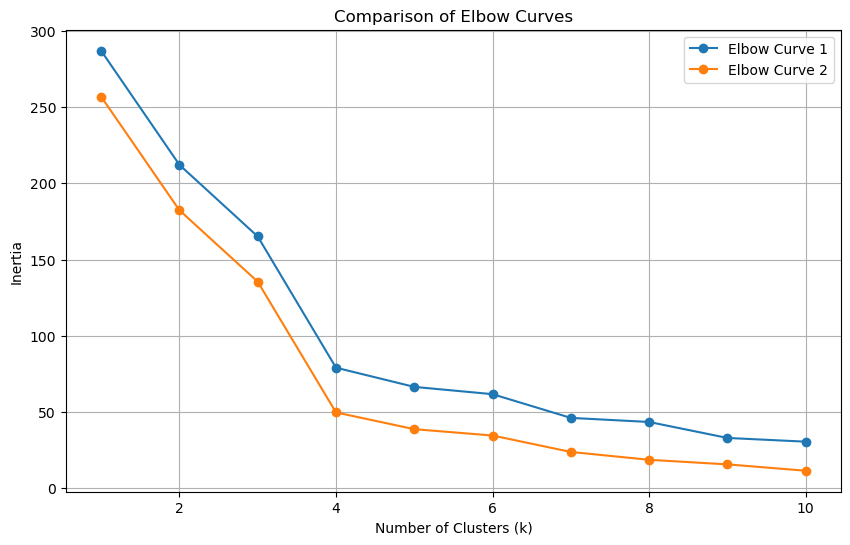

In [118]:
# Composite plot to contrast the Elbow curves

plt.figure(figsize=(10, 6))
plt.plot(k, inertia, marker='o', label='Elbow Curve 1')
plt.plot(k2, inertia2, marker='o', label='Elbow Curve 2')

# Add labels and title
plt.title('Comparison of Elbow Curves')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [123]:
# Composite plot to contrast the clusters

# Create the first scatter plot
scatter1 = market_pca_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    hover_cols="coin_id",
    by="predicted_clusters",

)

# Create the second scatter plot
scatter2 = market_predictions_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    color="predicted clusters", 
    hover_cols=["coin_id"],
    title="Composite plot"
)

# Arrange the plots in a grid layout
composite_plot = scatter1 + scatter2

# Display the composite plot
composite_plot


:Layout
   .NdOverlay.I :NdOverlay   [predicted_clusters]
      :Scatter   [PCA1]   (PCA2,coin_id)
   .Scatter.I   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted clusters,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** I think it is harder to see clustering affects with the smaller amount of data. Though the PCA group represents a total of 89.5% you can see that each grouping is a much lower accuracy compared to the first graph.